<a id='top'></a>

# CSCI3022 F20
# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Daniel Kim

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 4**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a/ id='p1'></a>

### (20 points) Problem 1: Theory (Sampling)
***

<img style="float: left; width: 200px; padding: 3mm;" src="https://upload.wikimedia.org/wikipedia/commons/5/57/Acme_ballot_box_-_Smithsonian.jpg" alt="A ballot box"/>  
You are the head of a news outlet on election day. You have embedded journalists in key U.S. States in order sample voters at different polling stations in the states. Once your journalists choose a polling station, they monitor the station for the election day. The journalists then report back the number of votes for each candidate, which is recorded in a special App on your phone, called Hippocampus. Overall, your team collected data from 6 polling stations in Alaska, 36 polling stations in Ohio, 12 polling stations in Colorado, 6 polling stations in Iowa, and 42 polling stations from California.

You want to get a sense of the average amount of votes for each candidate per polling station, so you use the Hippocampus app to randomly choose 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.

$$ \quad $$
    
**Part A:** Identify the following: 

- the population
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**Typeset your solution to part A in this cell or cells**

- the population : Polling stations
- the sample frame : Sampling voters at Alaska, Ohio, Colorado, Iowa, and California stations
- the sample : Randomly choosing 1 polling station in Alaska, 6 polling stations in Ohio, 2 polling stations in Colorado, 1 polling station in Iowa, and 7 polling stations from California.
- the type of sample : Stratified Sample
- the quantity of interest : The average amount of votes for each candidate per polling station.

**Part B:** You repeat your sampling, again using the Hippocampus app. Now, you order the stations alphabetically by State and choose every 3rd data value. 
    
Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

**Typeset your solution to part B in this cell or cells**

- the population : Polling stations
- the sample frame : Sampling voters at Alaska, Ohio, Colorado, Iowa, and California stations
- the sample : Choosing 36 polling stations throughout the states
- the type of sample : Systematic Sample
- the quantity of interest : The average amount of votes for each candidate per polling station.

[Back to top](#top)

<br>

<a/ id='p2'></a>

### (20 points) Problem 2: Theory and Computation (Means and Medians)
***

A method to investigate the sensitivity of the sample mean and sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the effect when $y$ changes. To illustrate this, consider the following dataset:
 
$$  4.2 \quad 5.1 \quad 5.0 \quad y \quad 3.8 \quad 4.1 \quad 5.5 \quad 1.9 $$




**Part A:** Compute the sample mean and sample median for $y=1.5$. Then compute both quantities again for $y=6$.

In [91]:
def findMeanAndMedian(y):
    
    list = [y, 4.2, 5.1, 5.0, 3.8, 4.1, 5.5, 1.9]
    list.sort()
    total = 0.0
    size = len(list)

    for i in list:
        total += i
    mean = total / size

    size = size//2
    if size % 2 == 0:
        median = (list[size] + list[size-1]) / 2
    else:
        median = list[size]
    print("Mean and Median for y = ", y)
    print("Mean: ",mean)
    print("Median: ",median)
    print()
    
findMeanAndMedian(1.5)
findMeanAndMedian(6.0)





Mean and Median for y =  1.5
Mean:  3.8875
Median:  4.15

Mean and Median for y =  6.0
Mean:  4.45
Median:  4.6



**Part B:** Is there a value for $y$ that would make the mean of the data equal to 6? If so, calculate the value of $y$ that makes the mean equal to 6. If not, clearly explain why not.
    
Is there a value for $y$ that would make the median of the data equal to 6? If so, calculate the values of $y$ that makes the median equal to 6. If not, clearly explain why not.

**Typeset and/or code your solution to part B in this cell or cells**
1. $y$ needs to be 18.4 to make the mean equal to 6


2. There is no value for $y$ that would make the median of the data equal to 6

    a) Even if size % 2 = 0, the average between two median cannot be 6
    
    b) If $y$ is bigger than 5.0, the median will always be 4.6
    
    c) If $y$ is less than 5.0 and bigger than 4.1, the median will not reach 6
    
    d) If $y$ is less than 4.1, the median will always be 4.15



**Part C**: Compute the sample variance and the sample standard deviation for the original dataset given in part A, with $y=6$.

In [92]:
import math
def findSVandSSD(y):
    list = [y, 4.2, 5.1, 5.0, 3.8, 4.1, 5.5, 1.9]
    total = 0.0
    size = len(list)
    mean = sum(list) / size
        
    
    for x in list:
        total += (x - mean) ** 2

    SV = total / (size - 1)
    SSD = math.sqrt(SV)
    
    print("Sample Variance:",SV)
    print("Sample Standard Deviation:",SSD)
    

findSVandSSD(6)

Sample Variance: 1.6199999999999999
Sample Standard Deviation: 1.2727922061357855


**Part D**: Compute the sample median for the following cases: 
- $y=5$ 
- $y=50$ 
- $y=4.36$ 
- $y \to \infty$ 
- $y \to -\infty$

In [93]:
def findMedian(y):
    
    list = [y, 4.2, 5.1, 5.0, 3.8, 4.1, 5.5, 1.9]
    list.sort()
    size = len(list)
    size = size//2
    
    if size % 2 == 0:
        median = (list[size] + list[size-1]) / 2
    else:
        median = list[size]
    print("Median for y = ", y)
    print("Median: ",median)
    print()
    
findMedian(5)
findMedian(50)
findMedian(4.36)
findMedian(float('inf'))
findMedian(float('-inf'))

Median for y =  5
Median:  4.6

Median for y =  50
Median:  4.6

Median for y =  4.36
Median:  4.28

Median for y =  inf
Median:  4.6

Median for y =  -inf
Median:  4.15



**Part E**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

**Typeset your solution to part E in this cell or cells**

- By varying $y$, what is the set of all the possible values that the sample mean could take on?

        The mean can range (-inf, inf) depending on $y$
    
    
- By varying $y$, what is the set of all the possible values that the sample median could take on? Specifically, for what sets of $y$ values does the median take on its different possible values?

        If $y$ is bigger than and equal to 5.0, the median will always be 4.6
    
        If $y$ is less than 5.0 and bigger than 4.1, the median will be between 4.15 and 4.6
    
        If $y$ is less than and equal to 4.1, the median will always be 4.15can
        
        Therefore, the range for median will be [4.15, 4.6]

    


**Part F**: Describe in words or mathematical notation, what happens to the sample standard deviation when $y$ is varied in the following ways: 
 
- $y \to \infty$ 
- $y \to \bar{x}$

**Typeset your solution to part F in this cell or cells**

As y approaches to positive infinity, the standard deviation also approaches to positive infinity.

As y approaches to the mean, the standard deviation approaches to zero.

[Back to top](#top)
<a/ id='p6'></a>

## (20 pts) Problem 3: Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12]`

`B=[0,0,0,12,7,18,47,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.exponential(scale=43, size=1000)`

For each data set, perform the following computations in parts A, B, and C:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [12]:
A =  pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12])
B = pd.Series([0, 0, 0, 12, 7, 18, 47, 25, 0, 13, 0, 35])
C = pd.Series(np.random.exponential(scale=43, size=1000))

print("Mean for data set A:", A.mean())
print("Standard deviation for data set A:", A.std())
print()

print("Mean for data set B:", B.mean())
print("Standard deviation for data set B:", B.std())
print()

print("Mean for data set C:", C.mean())
print("Standard deviation for data set C:", C.std())
print()


Mean for data set A: 6.0
Standard deviation for data set A: 3.8944404818493075

Mean for data set B: 13.083333333333334
Standard deviation for data set B: 15.64061341120571

Mean for data set C: 43.979510147169
Standard deviation for data set C: 44.71391118288805



**Part B:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation.

In [13]:
A =  pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12])
B = pd.Series([0, 0, 0, 12, 7, 18, 47, 25, 0, 13, 0, 35])
C = pd.Series(np.random.exponential(scale=43, size=1000))

A = A - A.mean()
B = B - B.mean()
C = C - C.mean()

print("Mean for data set A:", A.mean())
print("Standard deviation for data set A:", A.std())
print()

print("Mean for data set B:", B.mean())
print("Standard deviation for data set B:", B.std())
print()

print("Mean for data set C:", C.mean())
print("Standard deviation for data set C:", C.std())
print()


Mean for data set A: 0.0
Standard deviation for data set A: 3.8944404818493075

Mean for data set B: -1.1842378929335002e-15
Standard deviation for data set B: 15.64061341120571

Mean for data set C: 1.5916157281026244e-15
Standard deviation for data set C: 45.29626314855458



**Part C:** Compute and print  the mean and standard deviation of the new data set formed by subtracting the original mean from each observation and then dividing by the original standard deviation.

In [14]:
A =  pd.Series([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 , 11, 12])
B = pd.Series([0, 0, 0, 12, 7, 18, 47, 25, 0, 13, 0, 35])
C = pd.Series(np.random.exponential(scale=43, size=1000))

A = ( A - A.mean() ) / A.std()
B = ( B - B.mean() ) / B.std()
C = ( C - C.mean() ) / C.std()

print("Mean for data set A:", A.mean())
print("Standard deviation for data set A:", A.std())
print()

print("Mean for data set B:", B.mean())
print("Standard deviation for data set B:", B.std())
print()

print("Mean for data set C:", C.mean())
print("Standard deviation for data set C:", C.std())
print()


Mean for data set A: -5.124106267500723e-17
Standard deviation for data set A: 1.0

Mean for data set B: -5.551115123125783e-17
Standard deviation for data set B: 0.9999999999999998

Mean for data set C: 1.1723955140041654e-16
Standard deviation for data set C: 1.0



**Part D:** Why might this result matter?

**Typeset your solution to part D in this cell or cells**

Even though there are various of the values from these different data sets, we can scale them by giving the same standard deviation which allows us to compare scores between datasets. This is called the standardizing data.


**Part E:** Looking at each of the 3 data sets, come up with a real-world context where those kind of numbers might make for reasonable observations.

**Typeset your solution to part E in this cell or cells**

Let's say that students are taking CSCI 3022 in 3 different sections and all 3 sections just took Midterm 1. Even though there are more/less students compared to other sections and got a various scores of the midterm, we can scale them by giving all 3 datasets to the same standard deviation. This process allows us to compare scores between datasets. 


[Back to top](#top)
<a/ id='p4'></a>

## (35 pts) Problem 4: Data (monthly patterns)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [15]:
dfPrecip = pd.read_csv('../Data/BoulderPrecip.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.4,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.3,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.6,1.06,0.08,0.7,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2020 isn't over yet!  We have one row at the bottom that isn't fully complete and NA values have been filled into the months that haven't happened yet.  This can wreak havoc on a lot of our methods!  Drop the 2020 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric!

In [94]:
dfPrecip = dfPrecip.replace( "Tr", 0.0 )
dfPrecip = dfPrecip.replace( "NA", 0.0 )

dfPrecip = dfPrecip.astype( float )

dfPrecip.drop( dfPrecip[dfPrecip["Year"] == 2020].index )

print(dfPrecip)
print(dfPrecip.dtypes)

       Year   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV  \
0    1900.0  0.40  1.06  0.75  9.18  1.84  0.49  0.48  0.22  1.54  0.13  0.19   
1    1901.0  0.53  0.30  1.74  3.51  1.62  1.76  0.46  1.69  0.16  0.65  0.00   
2    1902.0  0.37  0.48  1.48  1.01  2.32  1.46  1.26  0.53  5.46  1.44  1.29   
3    1903.0  0.08  1.52  1.45  2.31  2.02  1.87  0.95  1.46  1.31  3.43  0.15   
4    1904.0  0.09  0.31  2.37  1.45  5.35  2.72  1.05  1.00  1.60  1.06  0.08   
..      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
115  2015.0  0.38  3.69  0.38  4.50  7.82  1.76  2.98  0.31  0.14  2.02  1.83   
116  2016.0  0.37  1.44  3.84  3.34  2.01  2.37  0.61  1.06  0.45  0.38  0.47   
117  2017.0  1.41  0.73  1.45  3.15  6.29  0.45  1.30  1.62  1.92  2.42  0.57   
118  2018.0  0.74  1.04  2.23  1.35  4.76  1.82  1.84  0.24  1.02  2.68  1.19   
119  2019.0  1.57  0.74  2.83  1.87  3.89  2.12  2.21  0.10  0.56  2.42  2.38   

      DEC  YEAR TOTAL  Spri

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

<AxesSubplot:>

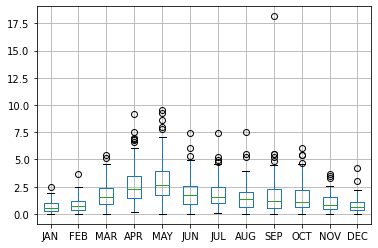

In [22]:
dfPrecip.boxplot( column = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"] )


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

<AxesSubplot:ylabel='Precipitation'>

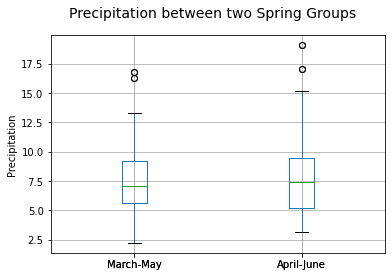

In [117]:
SpringGroup1 = dfPrecip["MAR"] + dfPrecip["APR"] + dfPrecip["MAY"]
SpringGroup2 = dfPrecip["APR"] + dfPrecip["MAY"] + dfPrecip["JUN"]

dfPrecip["March-May"] = SpringGroup1
dfPrecip["April-June"] = SpringGroup2
data = [dfPrecip["March-May"], dfPrecip["April-June"]]

figure = plt.figure()
figure.suptitle('Precipitation between two Spring Groups', fontsize = 14)

ax = figure.add_subplot(111)
ax.boxplot(data)

ax.set_ylabel('Precipitation')

dfPrecip.boxplot( column = ["March-May", "April-June"] )

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [70]:
print("Spring Group 1 Stats - ", dfPrecip['Spring1'].describe() )
print("-----------------------------------------------")
print()
print("Spring Group 2 Stats - ", dfPrecip['Spring2'].describe() )

Spring Group 1 Stats -  count    120.00000
mean       7.51900
std        2.73733
min        2.21000
25%        5.59750
50%        7.10000
75%        9.17500
max       16.75000
Name: Spring1, dtype: float64
-----------------------------------------------

Spring Group 2 Stats -  count    120.000000
mean       7.681917
std        2.939852
min        3.120000
25%        5.222500
50%        7.380000
75%        9.482500
max       19.070000
Name: Spring2, dtype: float64


**Typeset your analysis to part D in this cell or cells**

By comparing with Spring Group 1 Stats and Spring Group 2 Stats, the mean, standard deviation, and the Tukey five number are similar but Spring Group 2 has little higher numbers than Spring Group 1, except 25%. Since Spring Group 2 Stats starts later (April) than Spring Group 1 (March), I believe that it would make sense that the numbers are higher. There is this one reason why I would pick Spring Group 1 (Mar - May) than Spring Group 2 (April - June). I noticed that the data from Spring Group 2 are more spread apart compared to Spring Group 1, which makes Spring Group 1 more accurate than the other. So I want to highlight that Spring Group 1 have more accurate data than Spring Group 2.



**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

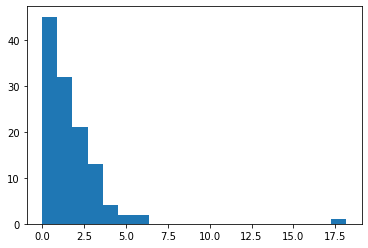

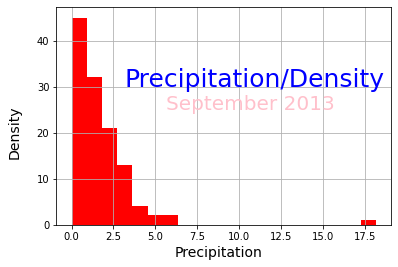

In [88]:
plt.hist( dfPrecip["SEP"], bins = 20 )
plt.show()


dfPrecip["SEP"].hist( bins = 20 )
plt.hist( dfPrecip["SEP"], bins = 20, color = 'red' )

plt.text( dfPrecip[dfPrecip["Year"] == 2013]["SEP"].values[0] - 15, 30, 'Precipitation/Density', size = 25, color = 'blue')
plt.text( dfPrecip[dfPrecip["Year"] == 2013]["SEP"].values[0] - 12.5, 25, 'September 2013', size = 20, color = 'pink')

plt.text(dfPrecip[dfPrecip["Year"] == 2013]["SEP"].values[0] - 22, 15, 'Density', rotation = 90, size = 14)
plt.text(dfPrecip[dfPrecip["Year"] == 2013]["SEP"].values[0] - 12, -7, 'Precipitation', size = 14)

plt.show()


**Typeset your analysis for part E in this cell or cells**

This histogram of Precipitation/Density in September 2013 is a positive right skewed histogram between 0 and 6. In addition, there is an outlier at 17.5 
